## Analyze Nobel Prize winner data

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the nobel.csv file in the data folder.

In [78]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [79]:
nobel = pd.read_csv('nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [80]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

## 1. Distribution of prizes by gender

### 1. Percentage of women and men among the laureates

In [81]:
import plotly.express as px
gender_counts = nobel['sex'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.pie(gender_counts, values='Count', names='Gender', 
             title='Percentage of Nobel Laureates by Gender',
             color_discrete_sequence=['#66b3ff','#ff9999'])
            
fig.update_layout(
    paper_bgcolor='white',
    font_color='black',
    title={
        'text': 'Percentage of Nobel Laureates by Gender',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)
fig.show()

The pie chart shows the distribution of rewards between men and women. The vast majority of winners are men.

### 2. Number of Awards Granted to Women and Men by Year

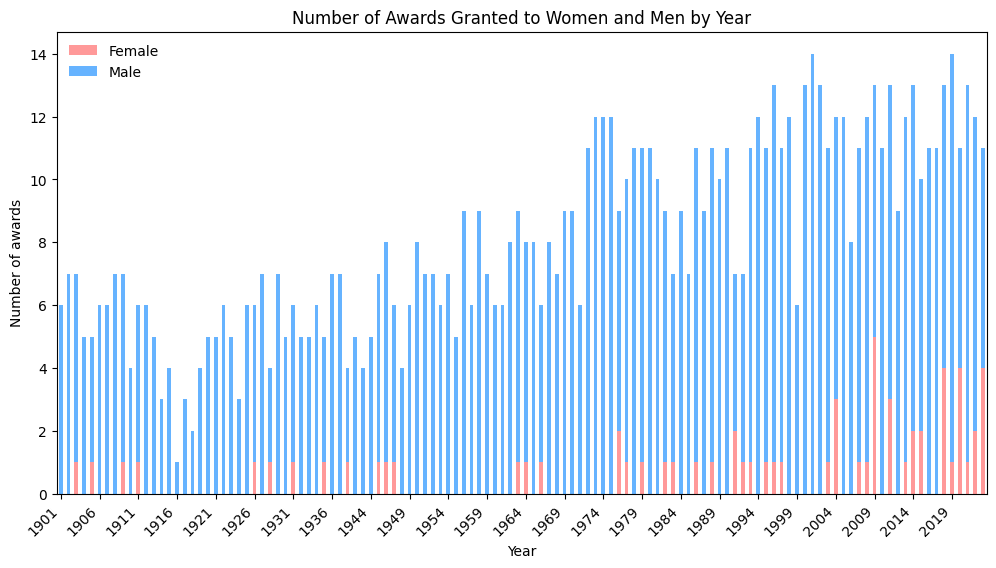

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

nobel['year'] = pd.to_numeric(nobel['year'], errors='coerce')

df_cleaned = nobel.dropna(subset=['year', 'sex'])

gender_counts = df_cleaned.groupby(['year', 'sex']).size().unstack()

plt.style.use('default')

plt.figure(figsize=(12, 6))
ax = plt.gca()
gender_counts.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], ax=ax)
plt.title('Number of Awards Granted to Women and Men by Year')
plt.xlabel('Year')
plt.ylabel('Number of awards')
plt.legend(title='Gender', labels=['Men', 'Women'])

ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.legend(loc='upper left', frameon=False)

ticks = ax.get_xticks()
ax.set_xticks(ticks[::5])
ax.set_xticklabels(gender_counts.index[::5], rotation=45, ha='right')

plt.show()

Considering the distribution of awarded prizes over time, they have been awarded to women more frequently after the year 2000.

## 2. Prize distribution by category

### 1. The most popular award categories

In [83]:
import plotly.graph_objects as go
category_counts = nobel['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

category_counts = category_counts.sort_values(by='Count', ascending=False)

fig = go.Figure(data=[go.Bar(
    x=category_counts['Category'],
    y=category_counts['Count'],
    marker_color='gray'
)])

fig.update_layout(
    title={
        'text': 'Number of Nobel Prizes by Category',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Category",
    yaxis_title="Number of Prizes",
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='black'),
    bargap=0.2,
    xaxis=dict(
        gridcolor='black'),  
    yaxis=dict(
        gridcolor='black'),  
    )


fig.show()

The chart shows how many awards were given in each category. The most awards were given in the fields of medicine and physics.

### 2. Nobel Prizes Distribution by Category Over the Years

In [84]:
import plotly.graph_objects as go
import pandas as pd

category_year_counts = nobel.groupby(['year', 'category']).size().reset_index(name='Count')


category_year_pivot = category_year_counts.pivot(index='year', columns='category', values='Count').fillna(0)


fig = go.Figure()

for category in category_year_pivot.columns:
    fig.add_trace(go.Scatter(
        x=category_year_pivot.index,
        y=category_year_pivot[category],
        mode='lines',
        stackgroup='one',  
        name=category
    ))

fig.update_layout(
    title={
        'text': 'Nobel Prizes Distribution by Category Over the Years',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Year",
    yaxis_title="Number of Prizes",
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='black'),

    xaxis=dict(
        gridcolor='gray'),
    yaxis=dict(
        gridcolor='gray')
)

fig.show()

## 3. Distribution of Nobel Prizes by year

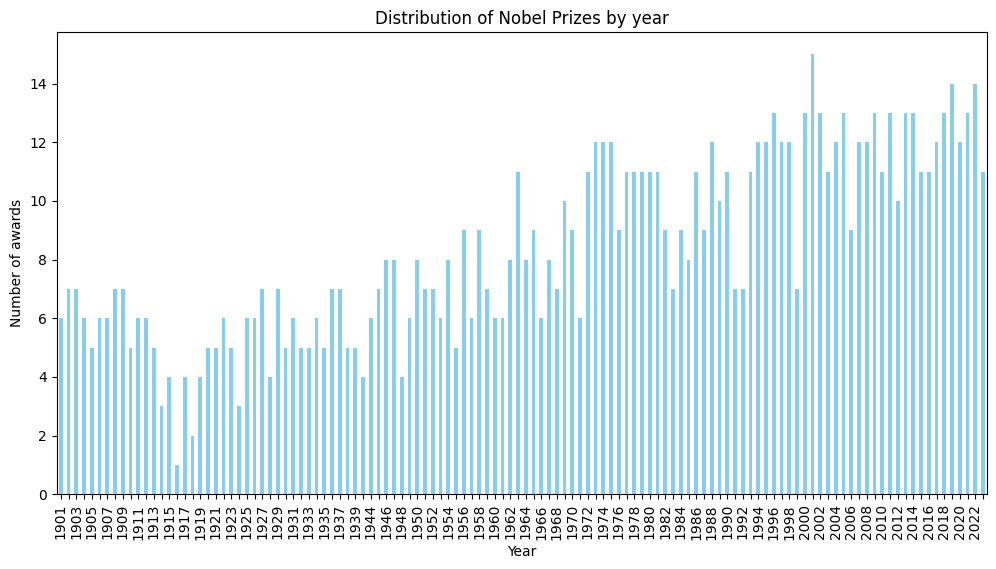

In [85]:
plt.figure(figsize=(12, 6))
ax = nobel['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Nobel Prizes by year')
plt.xlabel('Year')
plt.ylabel('Number of awards')

xticks_labels = [label if index % 2 == 0 else '' for index, label in enumerate(ax.get_xticklabels())]
ax.set_xticklabels(xticks_labels, rotation=90)

ax.tick_params(axis='x')
ax.tick_params(axis='y')

plt.show()

The bar chart above shows the increase in the number of Nobel Prizes awarded since 1970

## 4. The most common countries of origin of the winners:

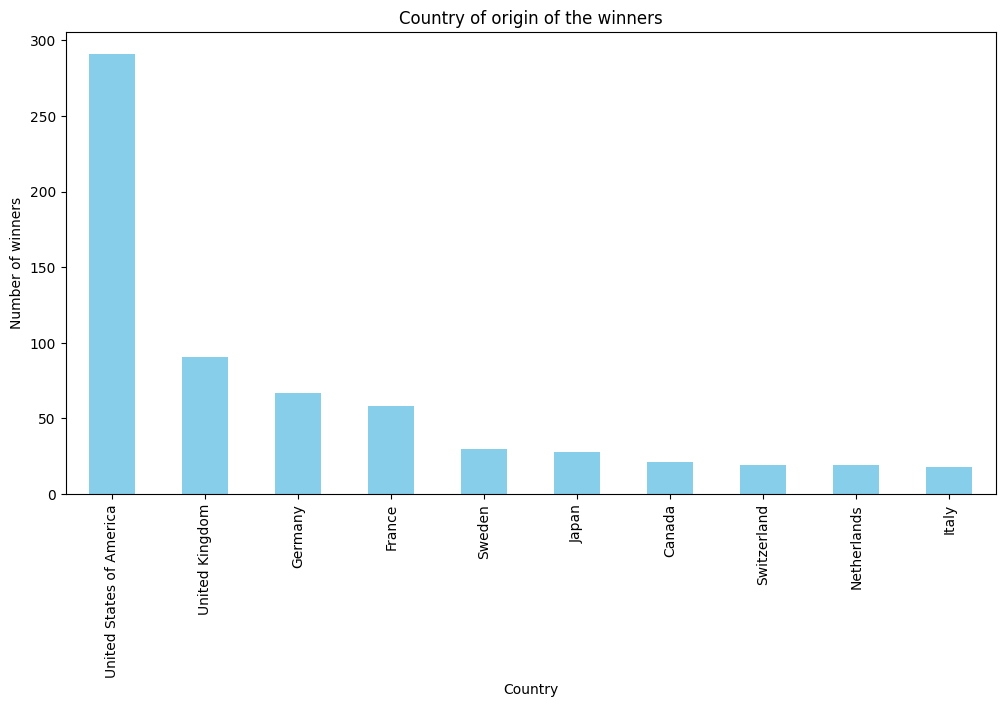

In [86]:
plt.figure(figsize=(12, 6))
nobel['birth_country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Country of origin of the winners')
plt.xlabel('Country')
plt.ylabel('Number of winners')

plt.gca().tick_params(axis='x')
plt.gca().tick_params(axis='y')

plt.show()

The bar chart shows the ten most common countries of origin of the winners. The United States, Great Britain and Germany are in the lead.

## 5. Number of Nobel Prize Winners from USA Over the Years

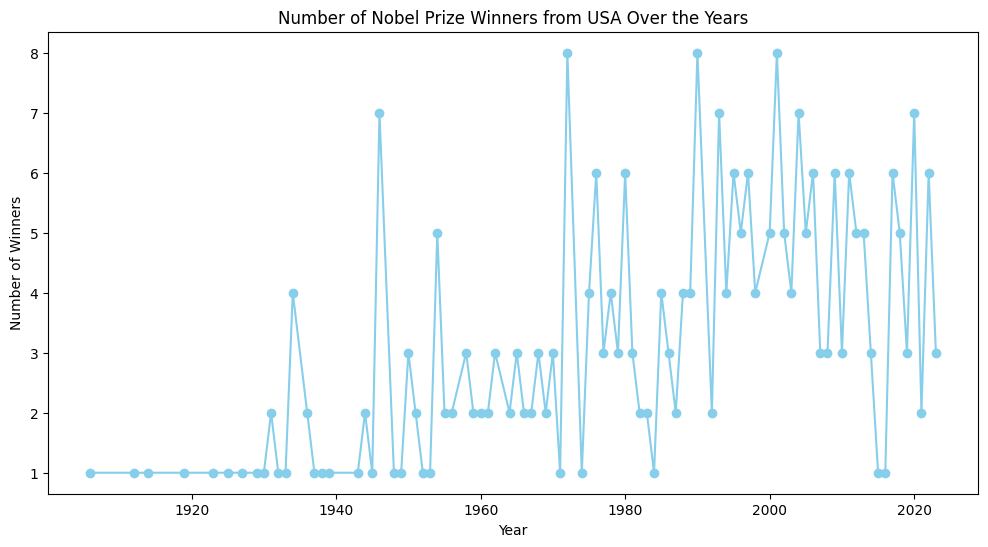

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

usa_winners = nobel[nobel['birth_country'] == 'United States of America']

usa_winners_per_year = usa_winners.groupby('year').agg({
    'full_name': lambda x: ', '.join(x),
    'birth_country': 'size'
}).reset_index()

usa_winners_per_year.columns = ['year', 'laureates', 'count']

plt.figure(figsize=(12, 6))
plt.plot(usa_winners_per_year['year'], usa_winners_per_year['count'], color='skyblue', marker='o')
plt.title('Number of Nobel Prize Winners from USA Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Winners')

plt.gca().tick_params(axis='x')
plt.gca().tick_params(axis='y')

plt.show()

The United States is the country where most Nobel Prize winners come from. Over the years, this number increases, there are years when they are able to win up to 8 awards in one year.

## 6. Age distribution of winners at the time of receiving the award

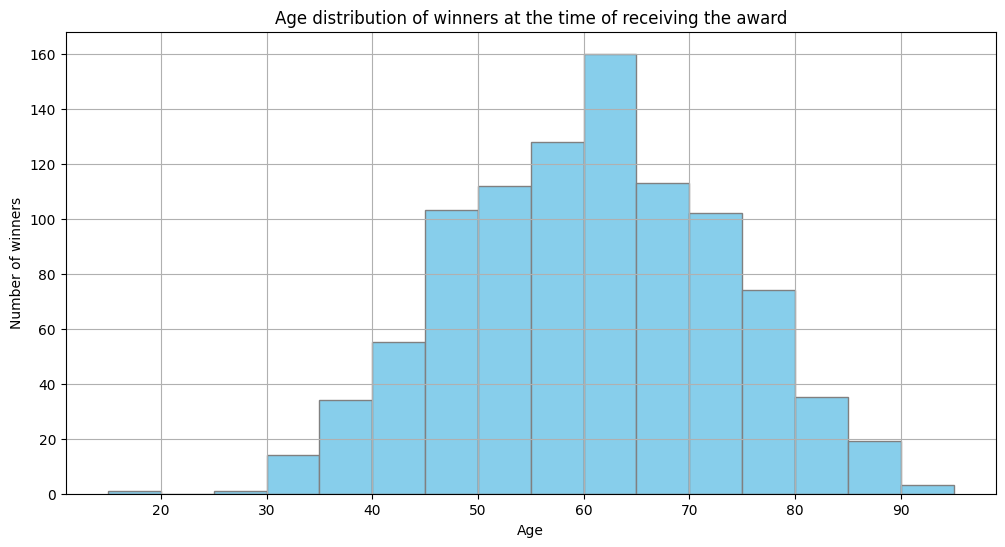

In [92]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], errors='coerce')
nobel['year'] = pd.to_numeric(nobel['year'], errors='coerce')

nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

nobel = nobel.dropna(subset=['age'])

plt.figure(figsize=(12, 6))
nobel['age'].hist(bins=range(15, 100, 5), color='skyblue', edgecolor='gray')
plt.title('Age distribution of winners at the time of receiving the award')
plt.xlabel('Age')
plt.ylabel('Number of winners')

plt.gca().tick_params(axis='x')
plt.gca().tick_params(axis='y')

plt.show()

In [95]:
average_age = nobel['age'].mean()
print(f"Average age of winners when receiving the award: {average_age:.2f} years old")

Average age of winners when receiving the award: 60.21 years old


The average age to receive a Nobel Prize is 60. Most awards are given to people aged 60-65. This may suggest that experience and long-term work are crucial to receiving the award.